<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/cluster_membership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages

In [0]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

### Import and Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [2]:
# import member dataset
member = pd.read_csv('https://raw.githubusercontent.com/mahmud-nobe/Cluster-Membership/master/n884_mem.csv')
member.head(5)

,RA_ICRS,DE_ICRS,Source,GLON,GLAT,plx,e_plx,pmRA,e_pmRA,pmDE,e_pmDE,o_Gmag,Gmag,BP-RP,PMemb,Cluster,_RA.icrs,_DE.icrs
0,35.414700,56.998612,458311532056974336,135.016952,-3.741123,0.4406,0.0304,-0.340,0.061,-0.800,0.066,258,14.762490,0.658170,0.5,NGC_884,35.414702,56.998615
1,35.417161,56.998057,458311532056974464,135.018405,-3.741186,0.4387,0.0980,-0.303,0.190,-0.970,0.197,280,17.157730,1.647366,0.3,NGC_884,35.417163,56.998061
2,35.392245,56.996236,458311566416713600,135.006249,-3.747538,0.4182,0.0435,-0.746,0.084,-1.338,0.093,270,15.710485,0.956811,0.7,NGC_884,35.392251,56.996242
3,35.388396,56.992285,458311566416713984,135.005627,-3.751968,0.3541,0.0242,-0.688,0.055,-1.219,0.053,253,13.630529,0.637017,0.4,NGC_884,35.388402,56.992290
4,35.409224,57.006802,458311600776450816,135.011336,-3.734447,0.3837,0.0590,-0.453,0.107,-1.159,0.116,273,16.240725,1.258944,0.2,NGC_884,35.409227,57.006807


In [3]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

,RA_ICRS,DE_ICRS,Source,GLON,GLAT,plx,e_plx,pmRA,e_pmRA,pmDE,e_pmDE,o_Gmag,Gmag,BP-RP,PMemb,_RA.icrs,_DE.icrs
count,1107.000000,1107.000000,1.107000e+03,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1098.000000,1107.000000,1107.000000,1107.000000
mean,35.669128,57.136607,4.584198e+17,135.099489,-3.563817,0.394660,0.055318,-0.589288,0.103309,-1.035505,0.115290,266.095754,15.212058,1.032836,0.488889,35.669133,57.136611
std,0.203451,0.112922,2.951795e+13,0.110841,0.112720,0.050145,0.030342,0.217097,0.057488,0.219616,0.062315,23.490328,1.849833,0.361234,0.245931,0.203451,0.112922
min,35.343833,56.821045,4.583058e+17,134.923423,-3.863963,0.283100,0.019500,-1.437000,0.035000,-1.879000,0.042000,129.000000,6.210630,0.303563,0.100000,35.343838,56.821049
25%,35.508695,57.068122,4.584059e+17,135.013822,-3.635055,0.358750,0.034250,-0.712000,0.064000,-1.164500,0.073500,253.000000,14.246502,0.726127,0.300000,35.508699,57.068126
50%,35.624218,57.139308,4.584115e+17,135.076991,-3.565761,0.394100,0.045800,-0.586000,0.085000,-1.049000,0.096000,268.000000,15.608300,1.020511,0.500000,35.624224,57.139313
75%,35.824777,57.209976,4.584531e+17,135.166715,-3.490694,0.431800,0.066300,-0.471500,0.123000,-0.930500,0.138500,282.000000,16.475282,1.306833,0.700000,35.824782,57.209982
max,36.154135,57.398243,4.584645e+17,135.382923,-3.293396,0.507300,0.188400,0.301000,0.396000,-0.087000,0.448000,327.000000,17.996572,2.581698,1.000000,36.154139,57.398246


In [4]:
# correlation of PMemb with other variables
member.corr().PMemb

RA_ICRS    -0.218993
DE_ICRS     0.138907
Source      0.194950
GLON       -0.254187
GLAT        0.056178
plx         0.112450
e_plx      -0.479808
pmRA       -0.155766
e_pmRA     -0.491442
pmDE       -0.132710
e_pmDE     -0.481265
o_Gmag     -0.076678
Gmag       -0.326198
BP-RP      -0.424633
PMemb       1.000000
_RA.icrs   -0.218992
_DE.icrs    0.138908
Name: PMemb, dtype: float64

In [5]:
# Profile report of the full dataset
pd_prof.ProfileReport(member)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,18
Number of observations,1107
Total Missing (%),0.0%
Total size in memory,155.8 KiB
Average record size in memory,144.1 B
Numeric,11
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,7


In [6]:
# Dropping the NULL values
member = member.dropna()
member.describe()

,RA_ICRS,DE_ICRS,Source,GLON,GLAT,plx,e_plx,pmRA,e_pmRA,pmDE,e_pmDE,o_Gmag,Gmag,BP-RP,PMemb,_RA.icrs,_DE.icrs
count,1098.000000,1098.000000,1.098000e+03,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,35.669378,57.136251,4.584197e+17,135.099739,-3.564103,0.394712,0.055176,-0.588641,0.102953,-1.034608,0.114573,266.461749,15.207598,1.032836,0.489891,35.669383,57.136256
std,0.203849,0.113182,2.955938e+13,0.111037,0.113001,0.050184,0.030298,0.216352,0.057047,0.219179,0.061320,22.974856,1.851919,0.361234,0.245873,0.203849,0.113182
min,35.343833,56.821045,4.583058e+17,134.923423,-3.863963,0.283100,0.019500,-1.437000,0.035000,-1.879000,0.042000,129.000000,6.210630,0.303563,0.100000,35.343838,56.821049
25%,35.508529,57.068000,4.584059e+17,135.013743,-3.636024,0.358525,0.034200,-0.711000,0.064000,-1.163000,0.073000,254.000000,14.246426,0.726127,0.300000,35.508533,57.068005
50%,35.624004,57.139031,4.584114e+17,135.077246,-3.566391,0.394100,0.045600,-0.586000,0.085000,-1.049000,0.095500,268.000000,15.604971,1.020511,0.500000,35.624009,57.139035
75%,35.824912,57.209822,4.584531e+17,135.167126,-3.490616,0.431800,0.066175,-0.471250,0.123000,-0.930000,0.138000,282.000000,16.471650,1.306833,0.700000,35.824916,57.209826
max,36.154135,57.398243,4.584645e+17,135.382923,-3.293396,0.507300,0.188400,0.301000,0.396000,-0.087000,0.384000,327.000000,17.996572,2.581698,1.000000,36.154139,57.398246


In [7]:
# Choosing the predictors
features = member.loc[:,['RA_ICRS', 'DE_ICRS', 'plx', 'e_plx',
                         'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE',
                         'Gmag', 'BP-RP']]
features

,RA_ICRS,DE_ICRS,plx,e_plx,pmRA,e_pmRA,pmDE,e_pmDE,Gmag,BP-RP
0,35.414700,56.998612,0.4406,0.0304,-0.340,0.061,-0.800,0.066,14.762490,0.658170
1,35.417161,56.998057,0.4387,0.0980,-0.303,0.190,-0.970,0.197,17.157730,1.647366
2,35.392245,56.996236,0.4182,0.0435,-0.746,0.084,-1.338,0.093,15.710485,0.956811
3,35.388396,56.992285,0.3541,0.0242,-0.688,0.055,-1.219,0.053,13.630529,0.637017
4,35.409224,57.006802,0.3837,0.0590,-0.453,0.107,-1.159,0.116,16.240725,1.258944
...,...,...,...,...,...,...,...,...,...,...
1102,35.475146,57.108823,0.4078,0.1628,-0.069,0.273,-1.517,0.295,17.955290,1.558842
1103,35.820625,57.127543,0.4018,0.0393,-0.490,0.070,-0.933,0.081,15.145645,0.795093
1104,35.504081,57.113965,0.3138,0.0682,-1.096,0.125,-0.913,0.136,16.569098,1.390498
1105,35.875661,57.121199,0.4552,0.0455,-0.395,0.085,-0.938,0.100,15.643492,0.929671


In [8]:
# Descriptive stats
features.describe()

,RA_ICRS,DE_ICRS,plx,e_plx,pmRA,e_pmRA,pmDE,e_pmDE,Gmag,BP-RP
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,35.669378,57.136251,0.394712,0.055176,-0.588641,0.102953,-1.034608,0.114573,15.207598,1.032836
std,0.203849,0.113182,0.050184,0.030298,0.216352,0.057047,0.219179,0.061320,1.851919,0.361234
min,35.343833,56.821045,0.283100,0.019500,-1.437000,0.035000,-1.879000,0.042000,6.210630,0.303563
25%,35.508529,57.068000,0.358525,0.034200,-0.711000,0.064000,-1.163000,0.073000,14.246426,0.726127
50%,35.624004,57.139031,0.394100,0.045600,-0.586000,0.085000,-1.049000,0.095500,15.604971,1.020511
75%,35.824912,57.209822,0.431800,0.066175,-0.471250,0.123000,-0.930000,0.138000,16.471650,1.306833
max,36.154135,57.398243,0.507300,0.188400,0.301000,0.396000,-0.087000,0.384000,17.996572,2.581698


In [9]:
# The outcome that we want to use to train our model
targets = member['PMemb']
targets

0       0.5
1       0.3
2       0.7
3       0.4
4       0.2
       ... 
1102    0.1
1103    0.6
1104    0.2
1105    0.3
1106    0.6
Name: PMemb, Length: 1098, dtype: float64

In [10]:
# Probable members (PMemb >= 0.5) in this dataset
len(member[member['PMemb'] >= 0.5])

618

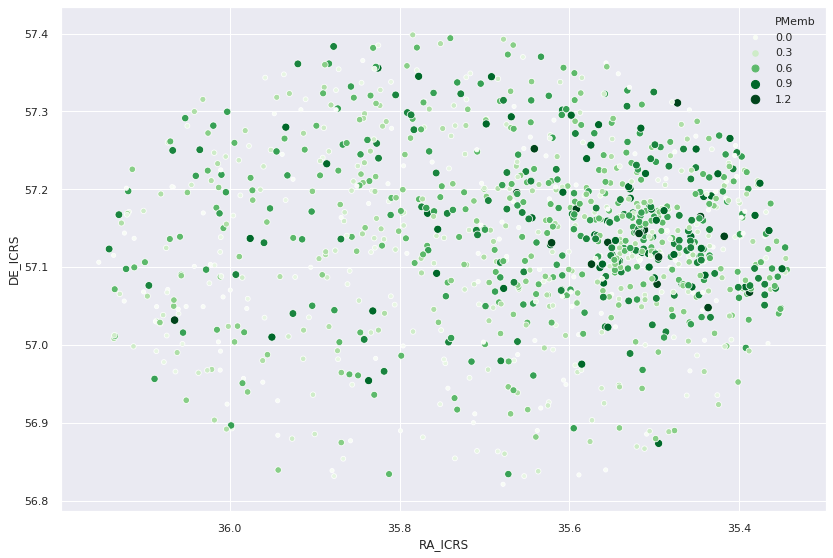

In [18]:
sns.set(rc={'figure.figsize':(13.7,9.27)})

skyplot = sns.scatterplot(member['RA_ICRS'], member['DE_ICRS'], hue=member['PMemb'], palette='Greens', size = member['PMemb'])
skyplot.invert_xaxis()

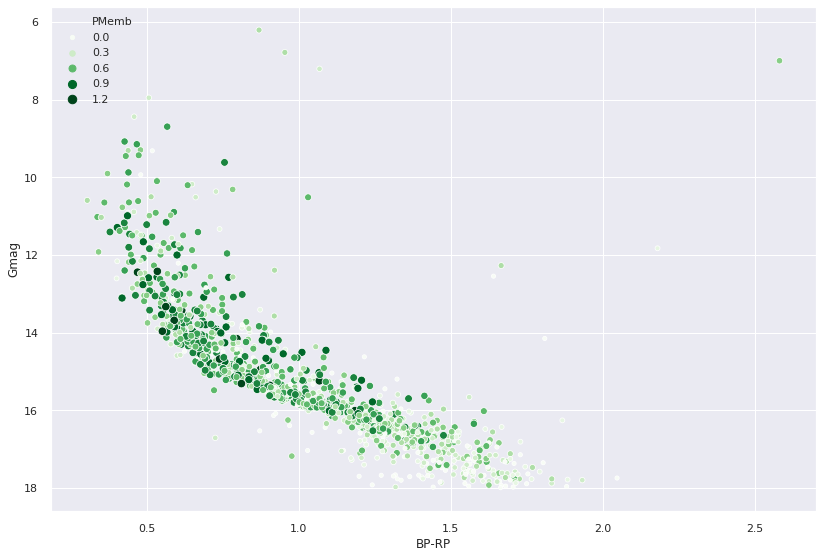

In [19]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)

cmd = sns.scatterplot(member['BP-RP'], member['Gmag'], hue=member['PMemb'], palette='Greens', size = member['PMemb'])
cmd.invert_yaxis()

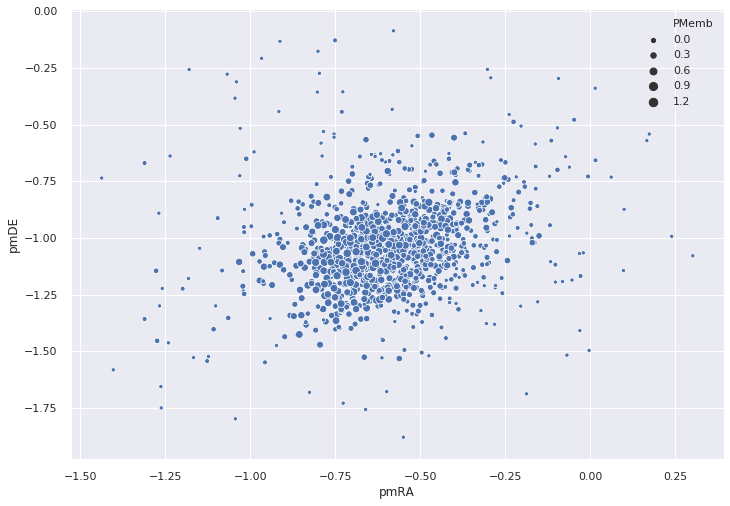

In [20]:
# proper motion plot marked with the membership probabilities of the stars 

sns.set(rc={'figure.figsize':(11.7,8.27)})
pm_plot = sns.scatterplot(member['pmRA'], member['pmDE'], size = member['PMemb'])

In [21]:
# data type of each variable
member.dtypes

RA_ICRS     float64
DE_ICRS     float64
Source        int64
GLON        float64
GLAT        float64
plx         float64
e_plx       float64
pmRA        float64
e_pmRA      float64
pmDE        float64
e_pmDE      float64
o_Gmag        int64
Gmag        float64
BP-RP       float64
PMemb       float64
Cluster      object
_RA.icrs    float64
_DE.icrs    float64
dtype: object

In [22]:
# changing the data type to 32-bit-float number as the built-in radom forest package 
# don't take 64-bit-float
from numpy import float32
features = features.astype('float32')
targets = targets.astype('float32')
features.dtypes

RA_ICRS    float32
DE_ICRS    float32
plx        float32
e_plx      float32
pmRA       float32
e_pmRA     float32
pmDE       float32
e_pmDE     float32
Gmag       float32
BP-RP      float32
dtype: object

In [23]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmRA       0.248844
pmDE       0.196464
e_pmRA     0.116945
e_pmDE     0.102541
plx        0.085130
e_plx      0.056455
Gmag       0.055792
DE_ICRS    0.054623
RA_ICRS    0.043323
BP-RP      0.039882
dtype: float64

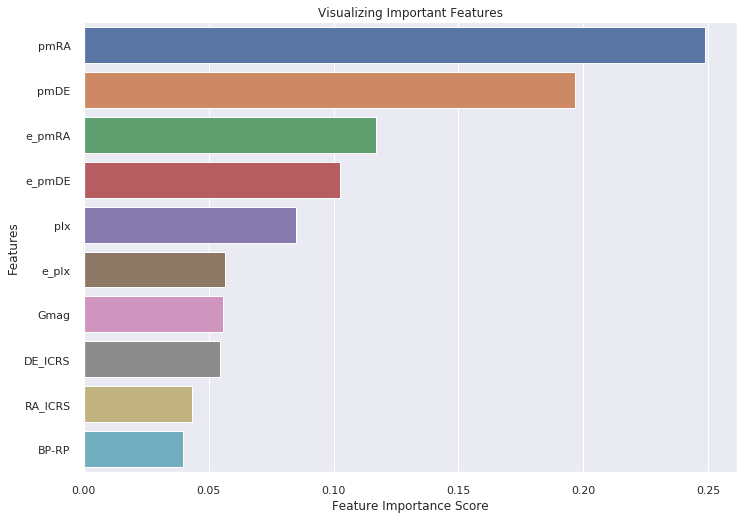

In [25]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [28]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.5539702580880618

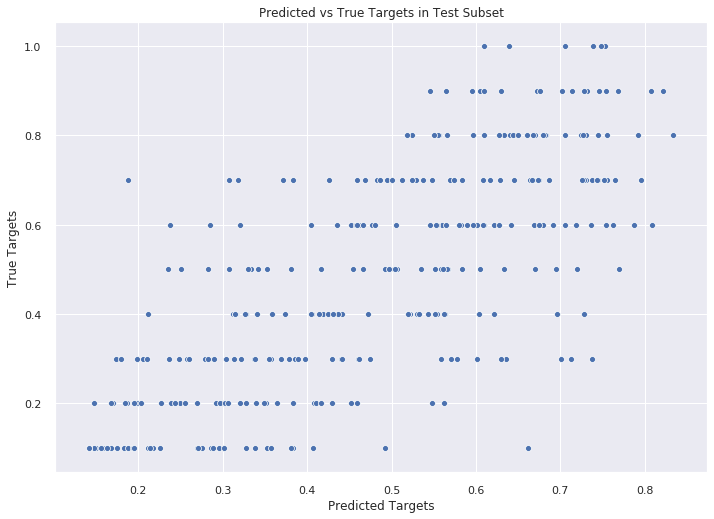

In [30]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [71]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [74]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

for ratio in test_ratio:
  test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

  # train the model using only training subset
  rfr.fit(train_features, train_targets)

  # find the accuracy rate to predict the outcome for test subset
  test_predict = rfr.predict(test_features)
  accuracy = rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy)

print(accuracy_rate)

[0.17997421328779817, 0.3574074270072607, 0.5017377166808488, 0.5318858994757576, 0.5459571818762152, 0.5485367957743879, 0.5607939997943714, 0.5944322935535977, 0.5517812234159423, 0.5656988924132628, 0.552480835028922, 0.5423754150773297, 0.5961359617768149, 0.5861648129449952, 0.6095270384372491, 0.5505344084230284, 0.6507231205864609, 0.5535133723142174, 0.6438806447488483]


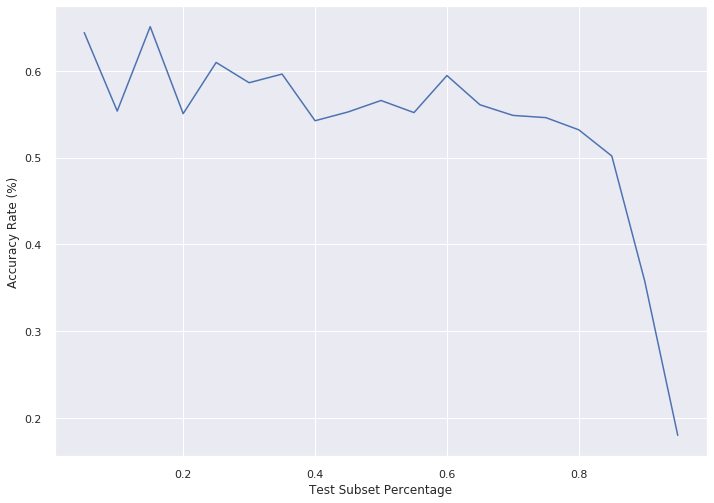

In [75]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [40]:
# Import all the stars from GAIA data around 30 m radius of cluster center
all_stars = pd.read_csv('https://raw.githubusercontent.com/mahmud-nobe/Cluster-Membership/master/n884_dr2_30m.csv')
all_stars

,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,RPlx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E_BP-RP_,Rad,Lum
0,36.075478,0.3115,56.701750,0.4030,457631960847743488,1.0578,0.5141,2.0578,-0.328,1.131,-2.157,1.075,0,198.02,0.85901,19.9466,0.0047,86.355,6.7141,20.5107,0.0844,188.73,5.2010,19.0723,0.0299,1.4383,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,36.081223,0.0804,56.702640,0.1013,457631960847750144,0.7426,0.1276,5.8218,5.742,0.265,-4.089,0.239,0,1482.00,1.80770,17.7612,0.0013,457.980,5.8443,18.6993,0.0139,1537.20,5.9617,16.7951,0.0042,1.9042,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,36.103756,0.1390,56.725204,0.1739,457632098286802816,0.5394,0.2091,2.5793,-0.368,0.460,-1.161,0.411,0,581.57,1.24040,18.7769,0.0023,256.250,7.6349,19.3297,0.0323,519.96,6.7113,17.9720,0.0140,1.3577,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,36.101254,0.2235,56.731873,0.2823,457632098287355136,-0.0567,0.3556,-0.1594,-0.443,0.750,-1.699,0.651,0,357.17,0.97302,19.3062,0.0030,170.400,8.6525,19.7727,0.0551,306.88,7.2481,18.5445,0.0256,1.2282,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,36.089980,0.1390,56.715750,0.1844,457632068228771328,0.1067,0.2258,0.4727,-1.528,0.462,-1.254,0.414,0,600.27,1.29240,18.7425,0.0023,249.730,6.6415,19.3577,0.0289,537.39,7.4658,17.9362,0.0151,1.4215,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53035,35.478000,0.3377,57.606170,0.4042,458505149184385920,-0.1248,0.5260,-0.2372,-0.762,1.226,-0.320,1.150,0,218.26,0.90429,19.8409,0.0045,103.140,8.5774,20.3179,0.0903,206.92,9.8354,18.9724,0.0516,1.3455,0.0,0.0,0.00,0.0,0.0,0.0,0.0
53036,35.475624,0.2272,57.609074,0.2456,458505149184385408,0.6979,0.3472,2.0099,1.259,0.784,-2.383,0.560,0,400.71,1.13010,19.1813,0.0031,160.180,8.1807,19.8399,0.0555,400.82,8.4730,18.2546,0.0230,1.5853,0.0,0.0,0.00,0.0,0.0,0.0,0.0
53037,35.506540,0.4131,57.621720,0.4285,458505282318561920,-0.2521,0.6141,-0.4105,2.113,1.480,-0.501,0.986,0,204.34,1.08810,19.9125,0.0058,95.691,11.5130,20.3992,0.1306,185.41,6.5336,19.0916,0.0383,1.3076,0.0,0.0,0.00,0.0,0.0,0.0,0.0
53038,35.447350,0.0539,57.618378,0.0631,458505424062291072,0.2630,0.0887,2.9661,0.198,0.182,-0.468,0.151,0,3262.10,2.79600,16.9046,0.0009,1399.900,11.2680,17.4861,0.0087,2751.80,11.9630,16.1629,0.0047,1.3232,0.0,0.0,4847.03,0.0,0.0,0.0,0.0


In [41]:
# checking the data types
all_stars.dtypes

RA_ICRS      float64
e_RA_ICRS    float64
DE_ICRS      float64
e_DE_ICRS    float64
Source         int64
Plx          float64
e_Plx        float64
RPlx         float64
pmRA         float64
e_pmRA       float64
pmDE         float64
e_pmDE       float64
Dup            int64
FG           float64
e_FG         float64
Gmag         float64
e_Gmag       float64
FBP          float64
e_FBP        float64
BPmag        float64
e_BPmag      float64
FRP          float64
e_FRP        float64
RPmag        float64
e_RPmag      float64
BP-RP        float64
RV           float64
e_RV         float64
Teff         float64
AG           float64
E_BP-RP_     float64
Rad          float64
Lum          float64
dtype: object

In [42]:
# descriptive stats
all_stars.describe()

,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,RPlx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E_BP-RP_,Rad,Lum
count,53040.000000,53040.000000,53040.000000,53040.000000,5.304000e+04,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,5.304000e+04,53040.000000,53040.000000,53040.000000,5.304000e+04,53040.000000,53040.000000,53040.000000,5.304000e+04,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000
mean,35.576922,0.684876,57.124467,0.755132,4.583766e+17,0.353881,0.370767,2.696087,0.086110,0.771315,-0.681893,0.748077,0.025905,1.965764e+04,25.110817,18.860336,0.006704,9.471654e+03,41.355580,17.498227,0.077085,1.522300e+04,69.322345,16.184749,0.031960,1.314374,-0.152362,0.011564,801.859785,0.067415,0.033546,0.299151,4.553934
std,0.487399,1.677188,0.347572,1.989000,1.994607e+15,0.787819,0.388971,7.032802,3.680368,0.855420,2.852858,0.848886,0.158853,5.930256e+05,1412.173418,1.916395,0.007631,2.628937e+05,1281.981132,5.688901,0.319247,5.646071e+05,4085.469332,5.272628,0.042036,0.544195,3.112614,0.269778,1864.914786,0.305221,0.152376,3.693827,194.794245
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-11.217300,0.000000,-14.620400,-107.354000,0.000000,-107.483000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.896500,-174.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.211562,0.096000,56.934923,0.120700,4.583641e+17,0.000000,0.062100,0.000000,-1.026000,0.118000,-1.312000,0.128000,0.000000,1.387425e+02,1.139575,17.906075,0.001700,7.481750e+01,7.105425,17.708600,0.010600,1.630800e+02,6.835225,16.278950,0.005000,1.153700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.570442,0.254400,57.128018,0.307200,4.584045e+17,0.285400,0.234300,0.979900,-0.003000,0.451000,-0.227000,0.449000,0.000000,3.509750e+02,1.422800,19.325100,0.004100,1.528300e+02,9.316950,19.521850,0.046600,3.615750e+02,8.830750,17.996000,0.018400,1.384600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.946352,0.568900,57.314662,0.696925,4.584539e+17,0.590800,0.575500,2.697625,0.628000,1.123000,0.296000,1.024250,0.000000,1.296825e+03,2.138925,20.332650,0.008500,5.252075e+02,13.110250,20.419400,0.111400,1.203700e+03,12.174250,18.951700,0.043700,1.613000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,36.516582,68.333000,57.624590,98.540800,4.585054e+17,11.542700,3.649200,228.246600,123.453000,5.089000,36.735000,5.205000,1.000000,6.181500e+07,243930.000000,21.461800,0.089700,3.235900e+07,163000.000000,22.898600,69.780000,7.115000e+07,715740.000000,20.971800,1.185400,3.750700,80.080000,18.390000,9434.500000,3.131000,1.589000,445.140000,21300.008000


In [0]:
# change to 32-bit-float
all_stars = all_stars.astype('float32')

In [44]:
# checking the name of all columns in this dataset and the previous dataset to compare
member.columns

Index(['RA_ICRS', 'DE_ICRS', 'Source', 'GLON', 'GLAT', 'plx', 'e_plx', 'pmRA',
       'e_pmRA', 'pmDE', 'e_pmDE', 'o_Gmag', 'Gmag', 'BP-RP', 'PMemb',
       'Cluster', '_RA.icrs', '_DE.icrs'],
      dtype='object')

In [45]:
all_stars.columns

Index(['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx',
       'e_Plx', 'RPlx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'FG',
       'e_FG', 'Gmag', 'e_Gmag', 'FBP', 'e_FBP', 'BPmag', 'e_BPmag', 'FRP',
       'e_FRP', 'RPmag', 'e_RPmag', 'BP-RP', 'RV', 'e_RV', 'Teff', 'AG',
       'E_BP-RP_', 'Rad', 'Lum'],
      dtype='object')

In [46]:
# Renaming necessary columns as the name of the previous dataset
all_stars = all_stars.rename(columns={'Plx': 'plx', 'e_Plx': 'e_plx'})
all_stars.columns

Index(['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'plx',
       'e_plx', 'RPlx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'FG',
       'e_FG', 'Gmag', 'e_Gmag', 'FBP', 'e_FBP', 'BPmag', 'e_BPmag', 'FRP',
       'e_FRP', 'RPmag', 'e_RPmag', 'BP-RP', 'RV', 'e_RV', 'Teff', 'AG',
       'E_BP-RP_', 'Rad', 'Lum'],
      dtype='object')

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:,['RA_ICRS', 'e_RA_ICRS', 'plx', 'e_plx',
                                 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE',
                                 'Gmag', 'BP-RP']]

In [50]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# extimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)

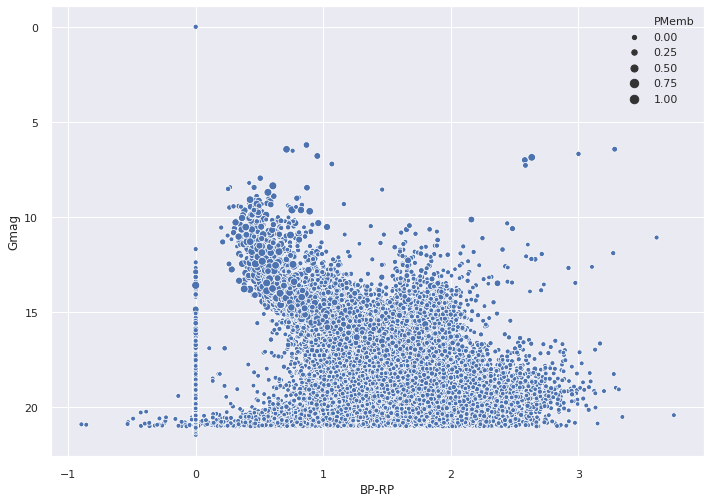

In [52]:
# CMD using all the stars where the membership Probability are expressed as the size of the dots

sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd = sns.scatterplot(all_stars['BP-RP'], all_stars['Gmag'], size = all_stars['PMemb'])
cmd.invert_yaxis()

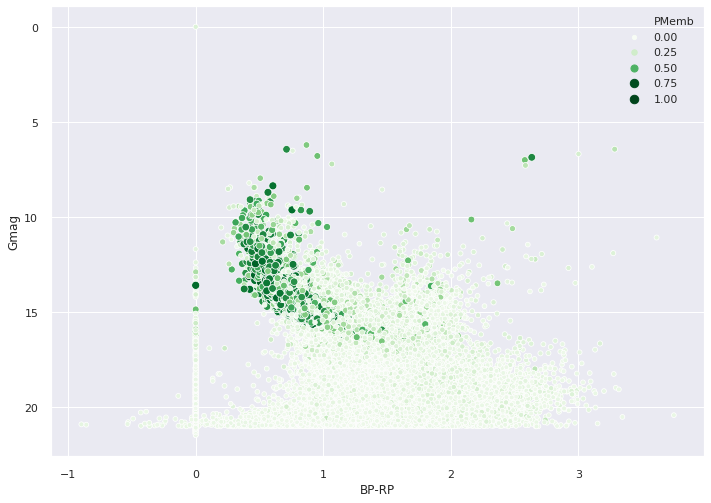

In [53]:
# CMD using all the stars where the membership Probability are expressed as colors

sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd = sns.scatterplot(all_stars['BP-RP'], all_stars['Gmag'], hue=all_stars['PMemb'], palette='Greens', size = all_stars['PMemb'])
cmd.invert_yaxis()

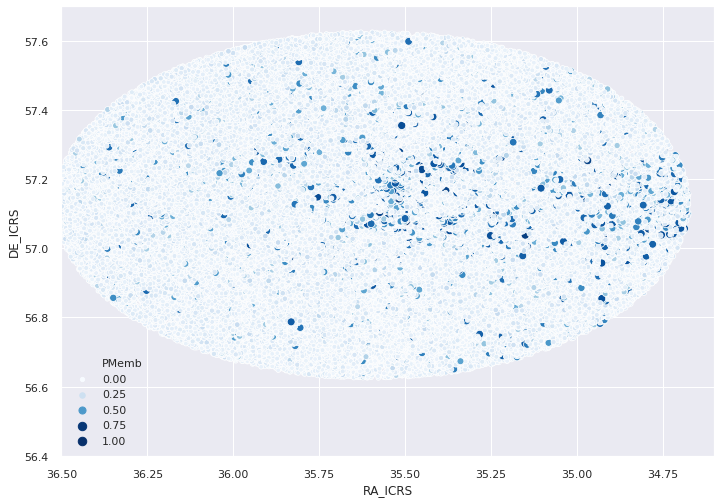

In [100]:
skyplot = sns.scatterplot(all_stars['RA_ICRS'], all_stars['DE_ICRS'], hue=all_stars['PMemb'], palette='Blues', size = all_stars['PMemb'])
plt.ylim(56.4,57.7)
plt.xlim(34.6,36.5)
skyplot.invert_xaxis()

In [54]:
# define the subset of the probable members
potentialMember = all_stars[all_stars['PMemb'] >= 0.5]
len(potentialMember)

1219

In [55]:
# comparing the descriptive stats of the all stars vs the probable members
all_stars.describe()

,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,plx,e_plx,RPlx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E_BP-RP_,Rad,Lum,PMemb
count,53040.000000,53040.000000,53040.000000,53040.000000,5.304000e+04,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,5.304000e+04,53040.000000,53040.000000,53040.000000,5.304000e+04,53040.000000,53040.000000,53040.000000,5.304000e+04,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000,53040.000000
mean,35.577007,0.684874,57.124374,0.755128,4.584703e+17,0.353881,0.370765,2.696085,0.086110,0.771317,-0.681895,0.748077,0.025905,1.965721e+04,25.110792,18.860435,0.006704,9.471652e+03,41.355415,17.498230,0.077085,1.522304e+04,69.322334,16.184820,0.031960,1.314371,-0.152362,0.011564,801.858948,0.067415,0.033546,0.299151,4.553935,0.189164
std,0.487397,1.677180,0.347572,1.988991,1.996807e+15,0.787793,0.388989,7.032619,3.680222,0.855426,2.852928,0.848902,0.158808,5.929211e+05,1412.048584,1.916392,0.007631,2.628932e+05,1281.710693,5.689079,0.319238,5.644875e+05,4085.126953,5.272691,0.042037,0.544190,3.112940,0.269862,1864.313354,0.305227,0.152331,3.693022,194.760483,0.077563
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-11.217300,0.000000,-14.620400,-107.353996,0.000000,-107.483002,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.896500,-174.419998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108000
25%,35.211562,0.096000,56.934923,0.120700,4.583641e+17,0.000000,0.062100,0.000000,-1.026000,0.118000,-1.312000,0.128000,0.000000,1.387425e+02,1.139575,17.906075,0.001700,7.481750e+01,7.105425,17.708599,0.010600,1.630800e+02,6.835225,16.278949,0.005000,1.153700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154000
50%,35.570442,0.254400,57.128019,0.307200,4.584045e+17,0.285400,0.234300,0.979900,-0.003000,0.451000,-0.227000,0.449000,0.000000,3.509750e+02,1.422800,19.325100,0.004100,1.528300e+02,9.316950,19.521850,0.046600,3.615750e+02,8.830750,17.996000,0.018400,1.384600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172000
75%,35.946352,0.568900,57.314662,0.696925,4.584539e+17,0.590800,0.575500,2.697625,0.628000,1.123000,0.296000,1.024250,0.000000,1.296825e+03,2.138925,20.332650,0.008500,5.252075e+02,13.110250,20.419399,0.111400,1.203700e+03,12.174250,18.951700,0.043700,1.613000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000
max,36.516582,68.333000,57.624592,98.540802,4.585054e+17,11.542700,3.649200,228.246597,123.453003,5.089000,36.735001,5.205000,1.000000,6.181500e+07,243930.000000,21.461800,0.089700,3.235900e+07,163000.000000,22.898600,69.779999,7.115000e+07,715740.000000,20.971800,1.185400,3.750700,80.080002,18.389999,9434.500000,3.131000,1.589000,445.140015,21300.007812,0.769000


In [56]:
potentialMember.describe()

,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,plx,e_plx,RPlx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E_BP-RP_,Rad,Lum,PMemb
count,1219.000000,1219.000000,1219.000000,1219.000000,1.219000e+03,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1.219000e+03,1219.000000,1219.000000,1219.000000,1.219000e+03,1219.000000,1219.000000,1219.000000,1.219000e+03,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,35.349251,0.023502,57.136375,0.031626,4.584029e+17,0.397615,0.039433,10.851385,-0.655668,0.072782,-1.084747,0.084592,0.059885,2.070287e+05,221.140182,14.412194,0.000501,1.117478e+05,353.419952,14.723882,0.003515,1.420879e+05,542.496094,13.894449,0.002442,0.829428,-0.105455,0.002223,5927.865234,0.334450,0.167690,3.324585,57.357056,0.602311
std,0.424367,0.006286,0.157939,0.008225,6.568669e+13,0.047503,0.010764,3.189808,0.106981,0.020878,0.126894,0.022424,0.237371,1.804948e+06,3070.977051,1.515903,0.000378,8.813914e+05,3336.102295,1.653821,0.003780,1.526581e+06,8630.820312,1.474976,0.003900,0.246747,2.706398,0.069802,859.771118,0.600562,0.301119,10.812116,595.159546,0.058846
min,34.676834,0.012500,56.639416,0.015800,4.576405e+17,0.140600,0.019800,3.957500,-0.907000,0.037000,-1.566000,0.042000,0.000000,4.369000e+03,2.838200,6.436800,0.000200,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-82.610001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,34.953375,0.018300,57.058270,0.025100,4.583741e+17,0.369700,0.030900,8.490000,-0.735000,0.056000,-1.167500,0.067000,0.000000,1.129950e+04,5.516050,13.653650,0.000300,5.761500e+03,18.149000,13.888250,0.002100,8.319050e+03,16.814000,13.251350,0.001400,0.644550,0.000000,0.000000,5214.135010,0.000000,0.000000,1.850000,2.514000,0.553000
50%,35.379745,0.022800,57.137276,0.030600,4.584059e+17,0.396700,0.038300,10.375800,-0.660000,0.070000,-1.070000,0.082000,0.000000,2.361000e+04,8.054300,14.755600,0.000400,1.279100e+04,30.181999,15.073000,0.002700,1.535400e+04,27.895000,14.295400,0.001800,0.808600,0.000000,0.000000,5846.000000,0.000000,0.000000,2.330000,5.670000,0.603000
75%,35.608358,0.027800,57.220835,0.037800,4.584536e+17,0.424500,0.046900,13.033750,-0.580500,0.086000,-0.995000,0.100500,0.000000,6.514650e+04,17.456500,15.555700,0.000600,3.836750e+04,84.980999,15.944950,0.003700,4.007600e+04,61.110500,14.958700,0.002400,0.999200,0.000000,0.000000,6507.294922,0.500000,0.273100,3.240000,15.275500,0.648000
max,36.483715,0.047400,57.598389,0.057800,4.585051e+17,0.816100,0.073100,21.341400,-0.306000,0.152000,-0.807000,0.185000,1.000000,5.019300e+07,91279.000000,16.587400,0.006100,2.817000e+07,87270.000000,17.098499,0.071900,4.184600e+07,248060.000000,15.862900,0.088900,2.635900,0.000000,2.420000,8875.330078,2.736000,1.409000,352.059998,16623.664062,0.769000


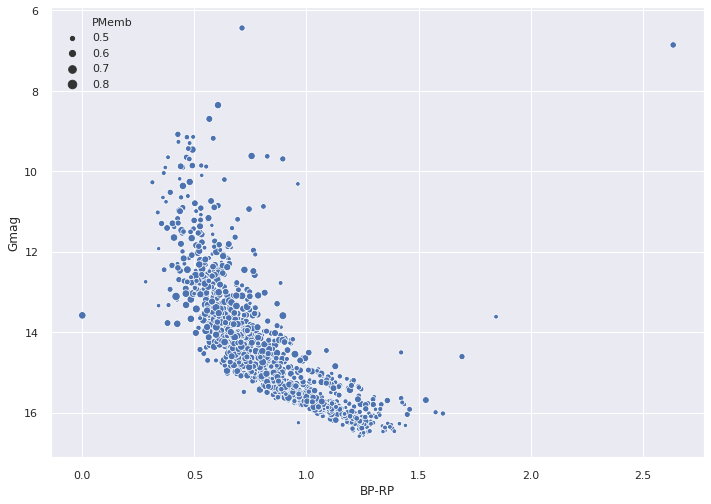

In [57]:
# CMD of only probable members 

sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd2 = sns.scatterplot(potentialMember['BP-RP'], potentialMember['Gmag'], size = potentialMember['PMemb'])
# plt.ylim(5,18)
cmd2.invert_yaxis()



### Comparing the new and old probable members

In [82]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [86]:
concatenated

,AG,BP-RP,BPmag,Cluster,DE_ICRS,Dup,E_BP-RP_,FBP,FG,FRP,GLAT,GLON,Gmag,Lum,PMemb,RA_ICRS,RPlx,RPmag,RV,Rad,Source,Teff,_DE.icrs,_RA.icrs,dataset,e_BPmag,e_DE_ICRS,e_FBP,e_FG,e_FRP,e_Gmag,e_RA_ICRS,e_RPmag,e_RV,e_plx,e_pmDE,e_pmRA,o_Gmag,plx,pmDE,pmRA
566,1.3647,0.565000,12.3574,NaN,56.856773,0.0,0.6855,157620.0,258240.0,154110.0,NaN,NaN,12.158300,83.712997,0.529,36.349205,10.2159,11.7923,0.0,5.89,4.576405e+17,7191.029785,NaN,NaN,New_member,0.0025,0.0256,359.260010,76.960999,173.539993,0.0003,0.0211,0.0012,0.0,0.0339,0.064,0.065,NaN,0.3468,-1.166,-0.696
597,0.0000,0.772000,14.7508,NaN,56.879944,0.0,0.0000,17388.0,31151.0,20570.0,NaN,NaN,14.454700,8.075000,0.628,36.258492,13.0596,13.9788,0.0,2.65,4.576407e+17,5974.500000,NaN,NaN,New_member,0.0021,0.0227,32.938999,8.717000,33.845001,0.0003,0.0192,0.0018,0.0,0.0297,0.068,0.077,NaN,0.3884,-1.185,-0.742
710,0.0000,0.817300,15.4145,NaN,56.918850,0.0,0.0000,9435.0,17313.0,11638.0,NaN,NaN,15.092400,3.959000,0.642,36.366379,13.0939,14.5972,0.0,2.02,4.576421e+17,5730.750000,NaN,NaN,New_member,0.0023,0.0239,20.171000,6.457400,24.249001,0.0004,0.0214,0.0023,0.0,0.0318,0.060,0.064,NaN,0.4162,-1.076,-0.664
714,0.0000,0.701900,14.0165,NaN,56.898777,0.0,0.0000,34195.0,59471.0,37928.0,NaN,NaN,13.752600,14.033000,0.530,36.353767,17.3965,13.3145,0.0,3.26,4.576421e+17,6190.000000,NaN,NaN,New_member,0.0023,0.0170,73.004997,13.005000,59.430000,0.0002,0.0152,0.0017,0.0,0.0233,0.043,0.046,NaN,0.4057,-1.040,-0.431
954,0.0000,0.777700,15.4499,NaN,56.983532,1.0,0.0000,9132.5,16494.0,10861.0,NaN,NaN,15.145000,4.227000,0.506,36.441547,12.5860,14.6722,0.0,1.80,4.576428e+17,6163.479980,NaN,NaN,New_member,0.0020,0.0240,16.510000,5.292500,17.112000,0.0003,0.0201,0.0017,0.0,0.0309,0.060,0.057,NaN,0.3894,-0.884,-0.693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,NaN,0.948518,NaN,NGC_884,57.251632,NaN,NaN,NaN,NaN,NaN,-3.496686,134.948602,14.548828,NaN,0.900,35.450775,NaN,NaN,NaN,NaN,4.584563e+17,NaN,57.251637,35.450780,Old_member,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0338,0.063,0.054,251.0,0.3990,-1.061,-0.689
1098,NaN,0.902059,NaN,NGC_884,57.314230,NaN,NaN,NaN,NaN,NaN,-3.395713,135.042359,14.246653,NaN,0.800,35.677643,NaN,NaN,NaN,NaN,4.584619e+17,NaN,57.314234,35.677648,Old_member,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0286,0.064,0.054,273.0,0.3691,-0.999,-0.640
1099,NaN,1.026316,NaN,NGC_884,57.162562,NaN,NaN,NaN,NaN,NaN,-3.559072,135.037532,15.851018,NaN,0.600,35.565147,NaN,NaN,NaN,NaN,4.584082e+17,NaN,57.162566,35.565151,Old_member,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0473,0.097,0.084,268.0,0.4372,-0.948,-0.515
1103,NaN,0.795093,NaN,NGC_884,57.127543,NaN,NaN,NaN,NaN,NaN,-3.543967,135.179961,15.145645,NaN,0.600,35.820625,NaN,NaN,NaN,NaN,4.584099e+17,NaN,57.127547,35.820629,Old_member,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0393,0.081,0.070,255.0,0.4018,-0.933,-0.490


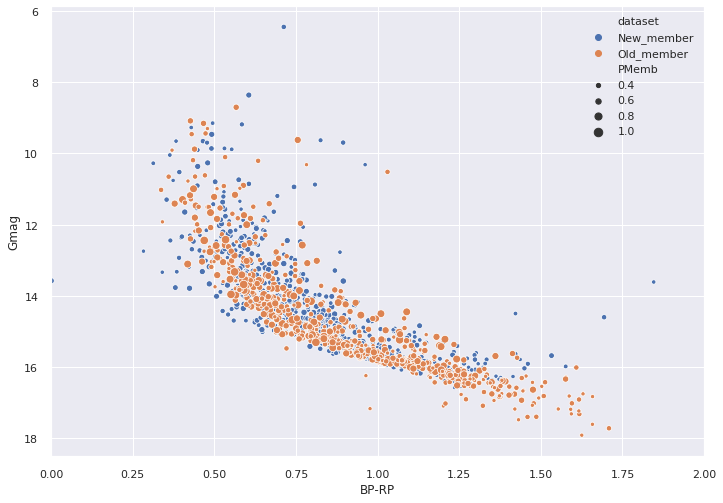

In [83]:
cmd = sns.scatterplot(x='BP-RP', y='Gmag', data=concatenated,
                size='PMemb', hue='dataset')
plt.xlim(0,2)
cmd.invert_yaxis()

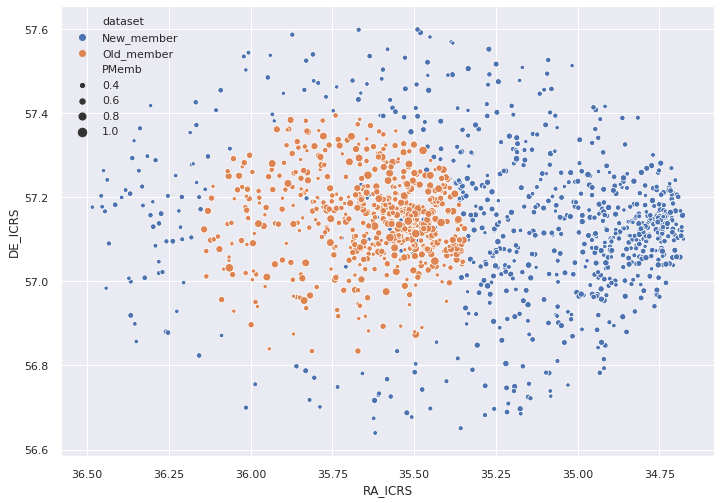

In [90]:
skyplot = sns.scatterplot(x='RA_ICRS', y='DE_ICRS', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

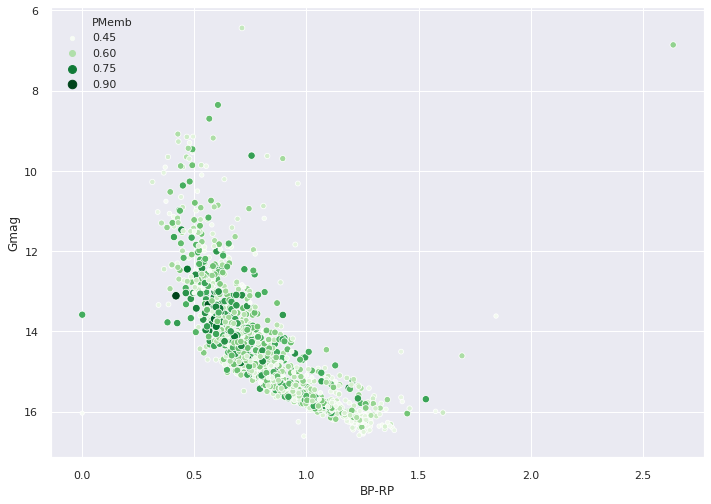

In [0]:
# CMD
sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd2 = sns.scatterplot(potentialMember['BP-RP'], potentialMember['Gmag'], hue=potentialMember['PMemb'], palette='Greens', size = potentialMember['PMemb'])
# plt.ylim(5,18)
cmd2.invert_yaxis()

In [0]:
all_stars.to_csv('n884_membership_prob.csv')

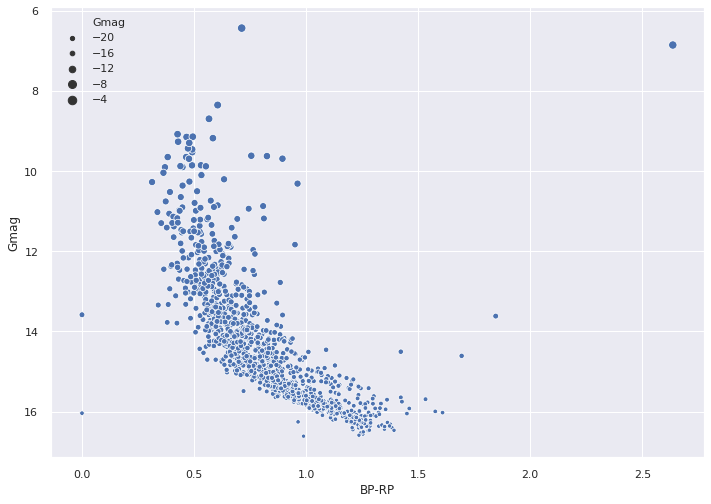

In [0]:
# CMD
sns.set(rc={'figure.figsize':(11.7,8.27)})
cmd2 = sns.scatterplot(potentialMember['BP-RP'], potentialMember['Gmag'], size = -1*potentialMember['Gmag'])
# plt.ylim(5,18)
cmd2.invert_yaxis()

In [77]:
a = np.array([2,2,3,3,3,5,6,4])
list(set(a))

[2, 3, 4, 5, 6]

In [0]:
pd_prof.ProfileReport(all_stars)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,34
Number of observations,53040
Total Missing (%),0.0%
Total size in memory,7.1 MiB
Average record size in memory,140.0 B
Numeric,23
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,10


(array([2.8767e+04, 2.0455e+04, 1.4880e+03, 5.5400e+02, 3.5000e+02,
        3.3000e+02, 3.7900e+02, 4.3100e+02, 2.6200e+02, 2.4000e+01]),
 array([0.111     , 0.1805    , 0.25      , 0.3195    , 0.389     ,
        0.45849999, 0.52799999, 0.59749999, 0.66699999, 0.73649999,
        0.80599999]),
 <a list of 10 Patch objects>)

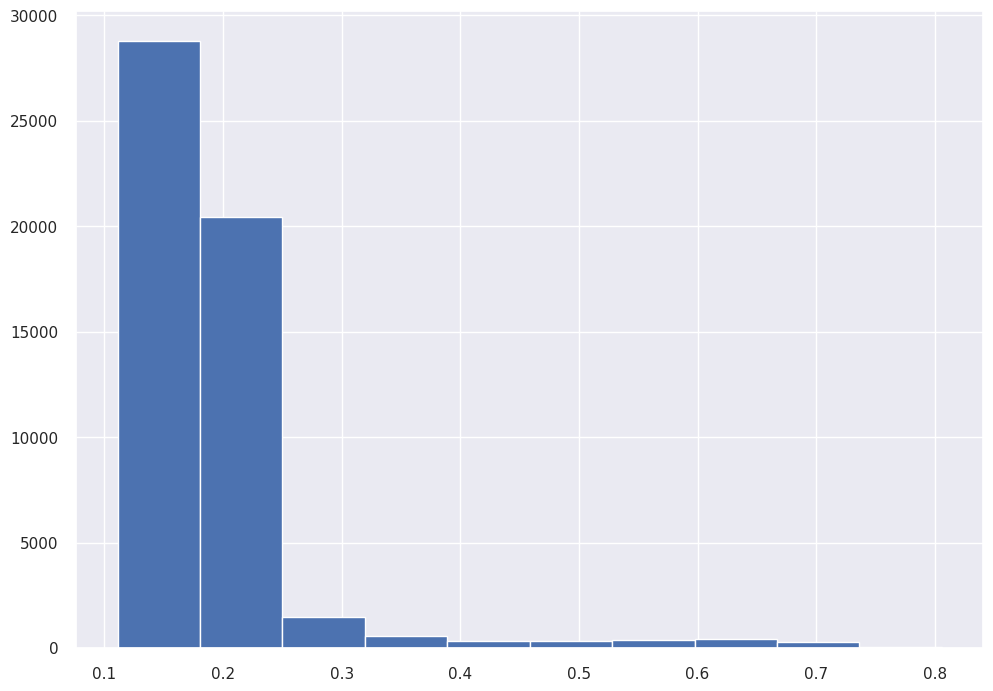

In [0]:
plt.hist(all_stars['PMemb'])